# Mini deep-learning framework

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
from modules import *

## Single Layer

In [5]:
X = 2 * np.random.rand(100,1)
Y = 4 +3*X+np.random.randn(100,1)
X = standarize(X)
Y = standarize(Y)
model = Linear(X.shape[1],Y.shape[1])
optim = LossMSE()
eta = 0.001
iterations = 100

In [6]:
cost = trainBatchGD(model,optim,X,Y,iterations, eta=eta)

Iter: 0 Cost:148.7183709778586
Iter: 3 Cost:86.91615512154688
Iter: 6 Cost:53.0730862014907
Iter: 9 Cost:34.541802134560285
Iter: 12 Cost:24.39566239504028
Iter: 15 Cost:18.841207233270225
Iter: 18 Cost:15.80096561670866
Iter: 21 Cost:14.137267166752194
Iter: 24 Cost:13.227132661314347
Iter: 27 Cost:12.72944951883224
Iter: 30 Cost:12.457460527631104
Iter: 33 Cost:12.308931347939561
Iter: 36 Cost:12.22790751632454
Iter: 39 Cost:12.183772048664167
Iter: 42 Cost:12.159777800044024
Iter: 45 Cost:12.146768537359254
Iter: 48 Cost:12.139741398703423
Iter: 51 Cost:12.135965221473027
Iter: 54 Cost:12.133950748652989
Iter: 57 Cost:12.132887205089538
Iter: 60 Cost:12.132334152184947
Iter: 63 Cost:12.132053044862447
Iter: 66 Cost:12.13191521879681
Iter: 69 Cost:12.131851675562395
Iter: 72 Cost:12.131825713767311
Iter: 75 Cost:12.131818038262898
Iter: 78 Cost:12.131818677888425
Iter: 81 Cost:12.131822613199274
Iter: 84 Cost:12.131827422038867
Iter: 87 Cost:12.131832019829675
Iter: 90 Cost:12.131835

Ploting


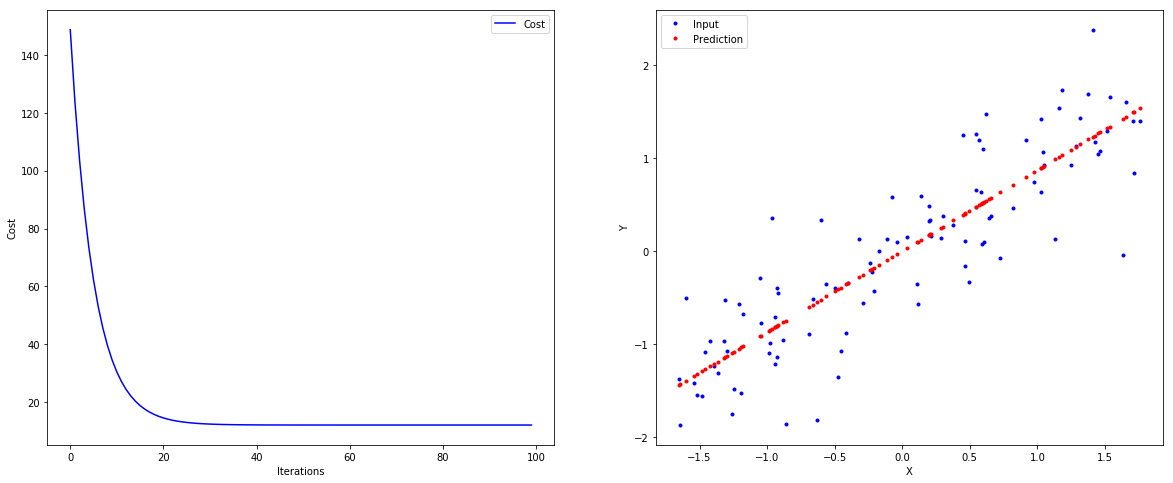

In [7]:
plotCostAndData(model,X,Y,cost)

## MultiLayer

### Linear + Activation

In [8]:
class NN(object):
    def __init__(self, in_layer_size, out_layer_size):
        self.fc1 = Linear(in_layer_size,out_layer_size, bias=False)
        self.ac1 = Tanh()
        
    def forward(self, x):
        s1 = self.fc1.forward(x)
        a1 = self.ac1.forward(s1)
        return a1
    
    def update(self, params):
        #print("W:", params[0].shape)
        self.fc1.update([params[0]])
        if len(params)>1:
            #print("R:", len([params[1]]))
            self.ac1.update(params[1])
        #print("W:",self.fc1.param()[0][0])
        #print("dW:",self.fc1.param()[0][1])

    def backward(self, dL_dy):
        '''
        output dy/dw2 = d(f(wx+b))/dw = x
        output dy/dw1 = d(f(wx+b))/dw = x 
        '''
        #print(dL_dy)
        dL_ds = self.ac1.backward(dL_dy)
        dL_dy0 = self.fc1.backward(dL_ds)
        #print(dL_dy0)
        return dL_dy0
    
    
    def param(self):
        return [self.fc1.param()[0],self.ac1.param()[0]]

In [9]:
nn = NN(X.shape[1],Y.shape[1])
optim_nn = LossMSE()
eta = 0.001
iterations = 100

In [10]:
cost_nn = trainBatchGD(nn,optim,X,Y,iterations, eta=eta)

Iter: 0 Cost:31.383187492577967
Iter: 3 Cost:27.53792879130867
Iter: 6 Cost:24.461980321444226
Iter: 9 Cost:22.042546419733462
Iter: 12 Cost:20.155398768292553
Iter: 15 Cost:18.686068688044493
Iter: 18 Cost:17.53894170477263
Iter: 21 Cost:16.6385006701194
Iter: 24 Cost:15.926902641591315
Iter: 27 Cost:15.360495069349357
Iter: 30 Cost:14.906495967580934
Iter: 33 Cost:14.54025618098026
Iter: 36 Cost:14.243149255280638
Iter: 39 Cost:14.000998940811034
Iter: 42 Cost:13.80292590545649
Iter: 45 Cost:13.640506843738294
Iter: 48 Cost:13.507161277604101
Iter: 51 Cost:13.397702712718312
Iter: 54 Cost:13.308008144104052
Iter: 57 Cost:13.234772947786297
Iter: 60 Cost:13.175327659748953
Iter: 63 Cost:13.127499889499138
Iter: 66 Cost:13.089509386387697
Iter: 69 Cost:13.05988764466915
Iter: 72 Cost:13.037415815033759
Iter: 75 Cost:13.02107638165733
Iter: 78 Cost:13.010015271503404
Iter: 81 Cost:13.003511930511992
Iter: 84 Cost:13.000955529353151
Iter: 87 Cost:13.00182591917756
Iter: 90 Cost:13.005678

Ploting


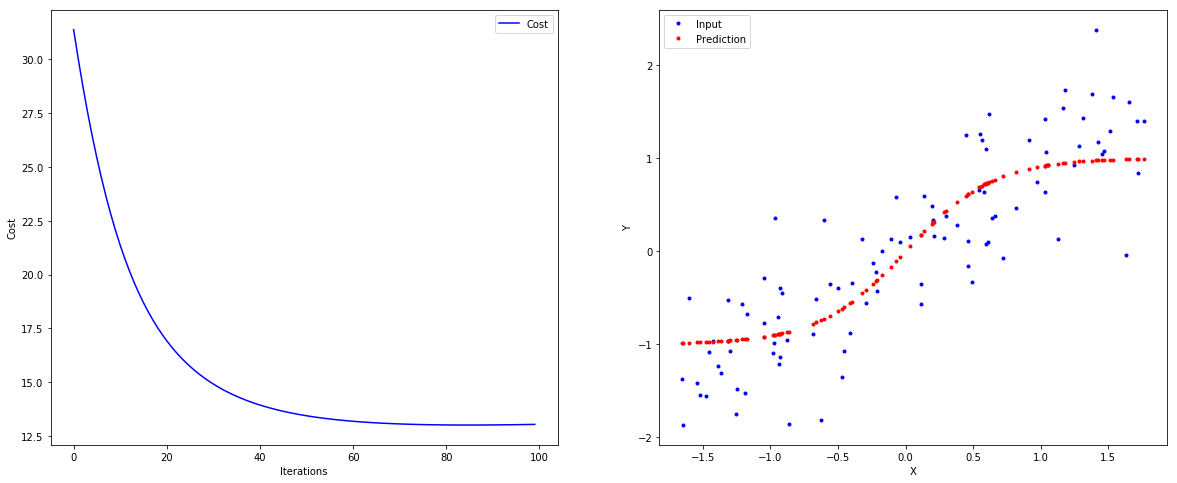

In [11]:
plotCostAndData(nn,X,Y,cost_nn)

### MLP (Lin+ Relu + Lin)

In [13]:
N, D_in, H1,H2, D_out = 200, 1, 50, 50, 1

X = 3 * np.random.rand(N,D_in)
Y = 4*np.sin(X) + 0.5*np.random.randn(N,D_out)
X = standarize(X)
Y = standarize(Y)

print("X", X.shape)
print("Y", Y.shape)

X (200, 1)
Y (200, 1)


In [14]:
class NN2(object):
    def __init__(self, in_layer_size, hidden_layer_size, out_layer_size):
        self.fc1 = Linear(in_layer_size,hidden_layer_size)
        self.ac1 = ReLu()
        self.fc2 = Linear(hidden_layer_size,out_layer_size)
        #self.ac2 = Tanh()

        
    def forward(self, x):
        s1 = self.fc1.forward(x)
        a1 = self.ac1.forward(s1)
        a2 = self.fc2.forward(a1)
        return a2
    
    def update(self, params):
        self.fc1.update([params[0]])
        self.fc2.update([params[1]])
        
    def backward(self, dL_dy2):
        '''
        output dy/dw2 = d(f(wx+b))/dw = x
        output dy/dw1 = d(f(wx+b))/dw = x 
        '''

        #dL_ds2 = self.ac2.backward(dL_dy2)
        dL_dy1 = self.fc2.backward(dL_dy2)
        dL_ds1 = self.ac1.backward(dL_dy1)
        dL_dy0 = self.fc1.backward(dL_ds1)
        
        return dL_dy0
    
    
    def param(self):
        return [self.fc1.param()[0],self.fc2.param()[0]]

In [15]:
nn = NN2(X.shape[1],30,Y.shape[1])
optim_nn = LossMSE()
iterations = 200
eta = 0.0001

In [16]:
cost_nn = trainBatchGD(nn,optim,X,Y,iterations, eta=eta)

Iter: 0 Cost:102.69728044994397
Iter: 3 Cost:101.05616107460513
Iter: 6 Cost:99.62170930658246
Iter: 9 Cost:98.32592218750034
Iter: 12 Cost:97.16173159857857
Iter: 15 Cost:96.08494276570772
Iter: 18 Cost:95.08520883044164
Iter: 21 Cost:94.17444568645529
Iter: 24 Cost:93.38062885293739
Iter: 27 Cost:92.60469390661021
Iter: 30 Cost:91.87242142696438
Iter: 33 Cost:91.2542033065679
Iter: 36 Cost:90.7179528041736
Iter: 39 Cost:90.27057364231165
Iter: 42 Cost:89.87433540333785
Iter: 45 Cost:89.51825972971794
Iter: 48 Cost:89.1938328194192
Iter: 51 Cost:88.91399707621484
Iter: 54 Cost:88.66620040400656
Iter: 57 Cost:88.45158821183604
Iter: 60 Cost:88.2724398332873
Iter: 63 Cost:88.11661730027484
Iter: 66 Cost:87.98359165128113
Iter: 69 Cost:87.89812826081808
Iter: 72 Cost:87.81290130777755
Iter: 75 Cost:87.6563547734371
Iter: 78 Cost:87.44113886971174
Iter: 81 Cost:87.18339989005946
Iter: 84 Cost:86.87197386847686
Iter: 87 Cost:86.54356366951075
Iter: 90 Cost:86.23265990770199
Iter: 93 Cost:8

Ploting


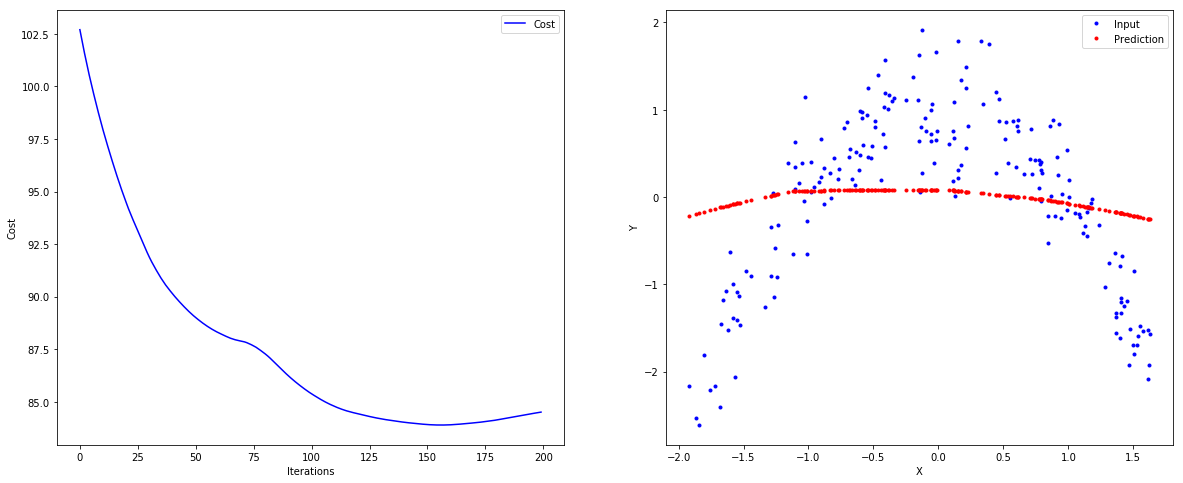

In [17]:
plotCostAndData(nn,X,Y,cost_nn)

### Sequential

In [18]:
nn_seq = Sequential(
    Linear(D_in, H1),
    Tanh(),
    Linear(H1, H2),
    Tanh(),
    Linear(H2, D_out)
)

optim_nn = LossMSE()
iterations = 300
eta = 0.0008
nn_seq.modules

{0: <modules.Linear at 0x11f8570b8>,
 1: <modules.Tanh at 0x11f8577f0>,
 2: <modules.Linear at 0x11f857e80>,
 3: <modules.Tanh at 0x11f532ef0>,
 4: <modules.Linear at 0x11f857518>}

In [19]:
cost_nn_seq = trainBatchGD(nn_seq,optim_nn,X,Y, iterations, eta=eta)

Iter: 0 Cost:97.35535572001353
Iter: 3 Cost:94.77405617093973
Iter: 6 Cost:94.02085039753682
Iter: 9 Cost:93.19863025172849
Iter: 12 Cost:92.37086372879182
Iter: 15 Cost:91.52205149620164
Iter: 18 Cost:90.62004116159598
Iter: 21 Cost:89.63535081761292
Iter: 24 Cost:88.54497708781561
Iter: 27 Cost:87.33285989575097
Iter: 30 Cost:85.98919532852362
Iter: 33 Cost:84.50921340630954
Iter: 36 Cost:82.89181599525669
Iter: 39 Cost:81.13837501069781
Iter: 42 Cost:79.25187095716123
Iter: 45 Cost:77.2364218611891
Iter: 48 Cost:75.09714218086883
Iter: 51 Cost:72.84019878834705
Iter: 54 Cost:70.4729041464307
Iter: 57 Cost:68.00370613838328
Iter: 60 Cost:65.44199510724287
Iter: 63 Cost:62.79773950897578
Iter: 66 Cost:60.081060930334246
Iter: 69 Cost:57.301939469563635
Iter: 72 Cost:54.470275770008435
Iter: 75 Cost:51.59651036243824
Iter: 78 Cost:48.692909068517906
Iter: 81 Cost:45.775461010790416
Iter: 84 Cost:42.86609050660662
Iter: 87 Cost:39.994549184134655
Iter: 90 Cost:37.19900366002982
Iter: 93

Ploting


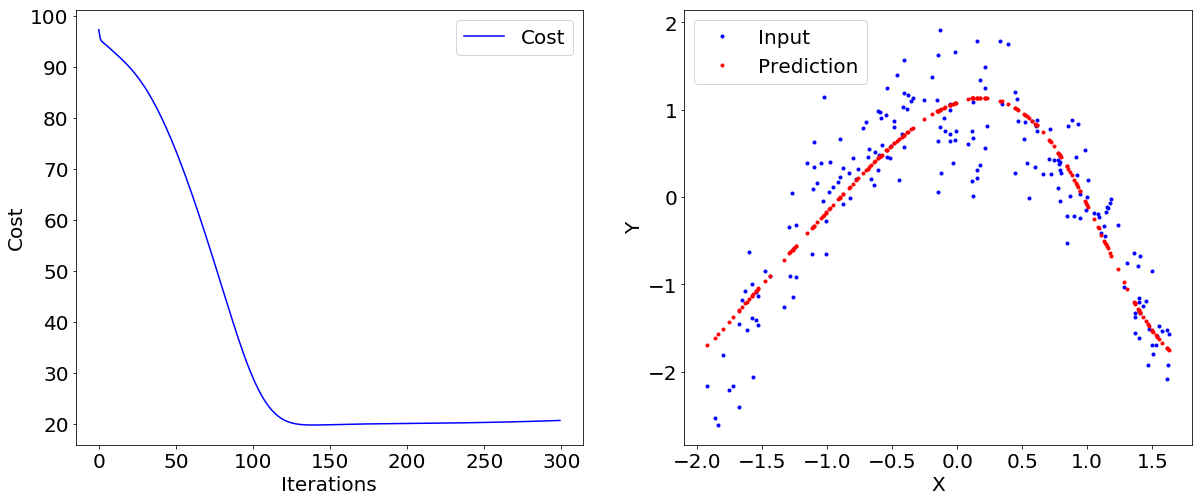

In [21]:
plotCostAndData(nn_seq,X,Y,cost_nn_seq)

## Circular input

In [77]:
def generate_disc_set(nb, radius=1):
    coords = 4*radius*np.random.rand(nb,2)
    center = [2*radius,2*radius]
    target = np.empty([nb,2])
    for index in range(nb):
        x = coords[index][0]
        y = coords[index][1]
        d = np.sqrt(np.square(x-center[0])+np.square(y-center[1]))
        inside = 1.0 if d <= radius else 0
        target[index][0] = inside
        target[index][1] = np.abs(1-inside)
        
    return coords, target

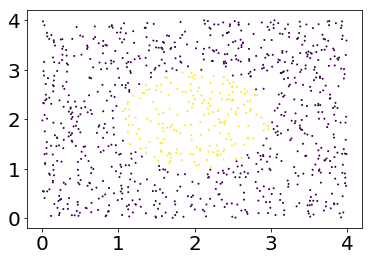

In [79]:
coor, t = generate_disc_set(1000)
plt.scatter(coor[:, 0], coor[:, 1], c = t[:, 0] ,s = 1)

In [ ]:
# Standardizing the data
mean, std = inp_train.mean(), inp_train.std()
inp_train.sub_(mean).div_(std);
inp_test.sub_(mean).div_(std);

## Assignment Test

In [35]:
def generate_disc_set(nb, radius=1):
    coords = 2*radius*np.random.rand(1000,2)
    center = [radius, radius]
    target = np.empty([nb,2])
    for index in range(nb):
        x = coords[index][0]
        y = coords[index][1]
        d = np.sqrt(np.square(x-center[0])+np.square(xy-center[1]))
        inside = 1 if d <= radius else 0
        target[index][0] = inside
        target[index][0] = np.abs(1-inside)
        
    return coords, target

def convert_to_one_hot_labels(input, target):
    tmp = input.new_zeros(target.size(0), target.max() + 1)
    tmp.scatter_(1, target.view(-1, 1), 1.0)
    return tmp

In [ ]:
# Generating the data for the test
nb = 1000
inp_train, target_train  = generate_disc_set(nb)
inp_test, target_test  = generate_disc_set(nb)

target_train = convert_to_one_hot_labels(inp_train, target_train)
target_test = convert_to_one_hot_labels(inp_test, target_test)



In [ ]:
plt.scatter(inp_test[:, 0], inp_test[:, 1], c = target_test[:, 0] > 0.5, s = 1)
plt.title('Target set')

In [ ]:
D_in, H, D_out = 2, 25, 2
nn_test = Sequential(
    Linear(D_in, H),
    Tanh(),
    Linear(H, H),
    Tanh(),
    Linear(H, H),
    Tanh(),
    Linear(H, H),
    Tanh(),
    Linear(H, D_out),
    Tanh()
)

optim_nn = LossMSE()
iterations = 200
eta = 0.0001
nn_test.modules
cost_nn_seq = trainBatchGD(nn_test, optim_nn, inp_train, target_train, iterations, eta=eta)

In [ ]:
# Computing the test error
def compute_nb_errors(model, data_input, data_target):
    mini_batch_size = 100
    nb_data_errors = 0

    for b in range(0, data_input.size(0), mini_batch_size):
        predicted_classes = model.forward(data_input.narrow(0, b, mini_batch_size))
        predicted_classes = predicted_classes > 0.7

        for k in range(mini_batch_size):
            if data_target[b + k, 0] != predicted_classes[k, 0].float():
                nb_data_errors = nb_data_errors + 1

    return nb_data_errors

nb_test_err = compute_nb_errors(nn_test, inp_test, target_test) 
print('Number of errors on the test set : ', nb_test_err)

In [ ]:
prediction = nn_test.forward(inp_test)
plt.scatter(inp_test[:, 0], inp_test[:, 1], c = prediction[:, 0] > 0.5, s = 1)
plt.title('Prediction on the test set')